### Explanatory Data Analysis on 2018 US flight data

In [1]:
from IPython.display import HTML

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#import the data from csv
df=pd.read_csv('fd.csv')


In [5]:
#first look on rows and columns 
print ((df.shape))

(2319612, 19)


The dataset contains2319612 rows and 19 columns.

In [6]:
print ("There is a total of {} flights in the dataset." .format(len(df.index)))

There is a total of 2319612 flights in the dataset.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2319612 entries, 0 to 2319611
Data columns (total 19 columns):
Year                int64
Month               int64
DayofMonth          int64
DayOfWeek           int64
UniqueCarrier       object
Origin              object
Dest                object
Distance            int64
Cancelled           int64
CancellationCode    object
Code                object
Description         object
iata                object
airport             object
city                object
state               object
country             object
lat                 float64
long                float64
dtypes: float64(2), int64(6), object(11)
memory usage: 238.9+ MB


The data is composed of integers, objects and floats. The memory usage is 336.2+ MB. 


In [8]:
df.head()


,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,Origin,Dest,Distance,Cancelled,CancellationCode,Code,Description,iata,airport,city,state,country,lat,long
0,2008,1,1,2,XE,EWR,MYR,550,0,NaN,XE,Expressjet Airlines Inc.,EWR,Newark Intl,Newark,NJ,USA,40.692497,-74.168661
1,2008,1,1,2,XE,AUS,ONT,1197,0,NaN,XE,Expressjet Airlines Inc.,AUS,Austin-Bergstrom International,Austin,TX,USA,30.194533,-97.669872
2,2008,1,1,2,XE,ONT,MCI,1318,0,NaN,XE,Expressjet Airlines Inc.,ONT,Ontario International,Ontario,CA,USA,34.056000,-117.601194
3,2008,1,1,2,XE,FAT,ONT,222,0,NaN,XE,Expressjet Airlines Inc.,FAT,Fresno Yosemite International,Fresno,CA,USA,36.776194,-119.718139
4,2008,1,1,2,XE,ONT,ELP,670,0,NaN,XE,Expressjet Airlines Inc.,ONT,Ontario International,Ontario,CA,USA,34.056000,-117.601194


In [9]:
#is any row null?
df.isnull().any()

Year                False
Month               False
DayofMonth          False
DayOfWeek           False
UniqueCarrier       False
Origin              False
Dest                False
Distance            False
Cancelled           False
CancellationCode     True
Code                False
Description         False
iata                False
airport             False
city                 True
state                True
country             False
lat                 False
long                False
dtype: bool

The data contains Null values in the columns Cancellation Code, city and state. This is acceptable for the intended purpose so I will keep them. 

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,2319612.0,2008.000000,0.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000
Month,2319612.0,6.343666,3.433463,1.000000,3.000000,6.000000,9.000000,12.000000
DayofMonth,2319612.0,15.727206,8.807478,1.000000,8.000000,16.000000,23.000000,31.000000
DayOfWeek,2319612.0,3.979993,1.997027,1.000000,2.000000,4.000000,6.000000,7.000000
Distance,2319612.0,812.030221,622.321614,11.000000,365.000000,640.000000,1034.000000,4962.000000
Cancelled,2319612.0,0.047514,0.212735,0.000000,0.000000,0.000000,0.000000,1.000000
lat,2319612.0,37.206219,5.924640,17.701889,33.640444,38.533963,41.066958,71.285448
long,2319612.0,-93.902916,17.520690,-176.646031,-104.667002,-87.904464,-81.316028,-64.798556


To summarize the first investigation, the data is very tidy and can easily be used for further analyis. 

In [11]:
#accessing the first data entry to see if there is any strange data to be seen 
print (df.iloc [358])

Year                                        2008
Month                                          1
DayofMonth                                     1
DayOfWeek                                      2
UniqueCarrier                                 XE
Origin                                       IAH
Dest                                         BRO
Distance                                     308
Cancelled                                      0
CancellationCode                             NaN
Code                                          XE
Description             Expressjet Airlines Inc.
iata                                         IAH
airport             George Bush Intercontinental
city                                     Houston
state                                         TX
country                                      USA
lat                                      29.9805
long                                    -95.3397
Name: 358, dtype: object


The Cancelation Code contains not NaN values. This needs to be fixed. 

In [12]:
# replace NaN values 
df.replace(np.nan, 0, inplace=True)

In [13]:
print (df.iloc [358])

Year                                        2008
Month                                          1
DayofMonth                                     1
DayOfWeek                                      2
UniqueCarrier                                 XE
Origin                                       IAH
Dest                                         BRO
Distance                                     308
Cancelled                                      0
CancellationCode                               0
Code                                          XE
Description             Expressjet Airlines Inc.
iata                                         IAH
airport             George Bush Intercontinental
city                                     Houston
state                                         TX
country                                      USA
lat                                      29.9805
long                                    -95.3397
Name: 358, dtype: object


Ok, looks good now. After I was using fillna I still got NaN, replace is the better choice in this case. 

### Investigation on the questions: 

    What are the airliners with the least cancellations?
    Which airports are the busiest ones? 
    Is there a timly insight on flight frequency over the months? 

In [14]:
# What is the proportion of cancelled flights to all flights?
print("the proportion of all canceled flight to all flights is:")
print(len(df[df.Cancelled != 0]) / float(len(df)))

the proportion of all canceled flight to all flights is:
0.047513549679860254


The overall cancellation rate of flights is 0.048 in 2018, nearly 5%.

In [15]:
# Trimming the value for US Airways - parentheses to be killed 
def remove_parenthetical_description(description):
    return description.split(' (')[0]

df.Description = df.Description.map(remove_parenthetical_description)

#check if the code worked 
#df[df.Code == 'US']


I have deleted the information for US Airways in parentheses as the info is not needed for the analyis. And it looks better now. 

In [16]:
grouped_carrier_g = df.groupby(by=['Description'])
proportional_cancellations_g = (grouped_carrier_g['Cancelled'].sum() / grouped_carrier_g.size())
proportional_cancellations_g

Description
AirTran Airways Corporation     0.021146
Alaska Airlines Inc.            0.034509
Aloha Airlines Inc.             0.018930
American Airlines Inc.          0.077419
American Eagle Airlines Inc.    0.098927
Atlantic Southeast Airlines     0.044458
Comair Inc.                     0.056807
Continental Air Lines Inc.      0.029433
Delta Air Lines Inc.            0.040082
Expressjet Airlines Inc.        0.048069
Frontier Airlines Inc.          0.008415
Hawaiian Airlines Inc.          0.023446
JetBlue Airways                 0.033992
Mesa Airlines Inc.              0.071780
Northwest Airlines Inc.         0.021091
Pinnacle Airlines Inc.          0.047517
Skywest Airlines Inc.           0.049999
Southwest Airlines Co.          0.027653
US Airways Inc.                 0.039248
United Air Lines Inc.           0.067956
dtype: float64

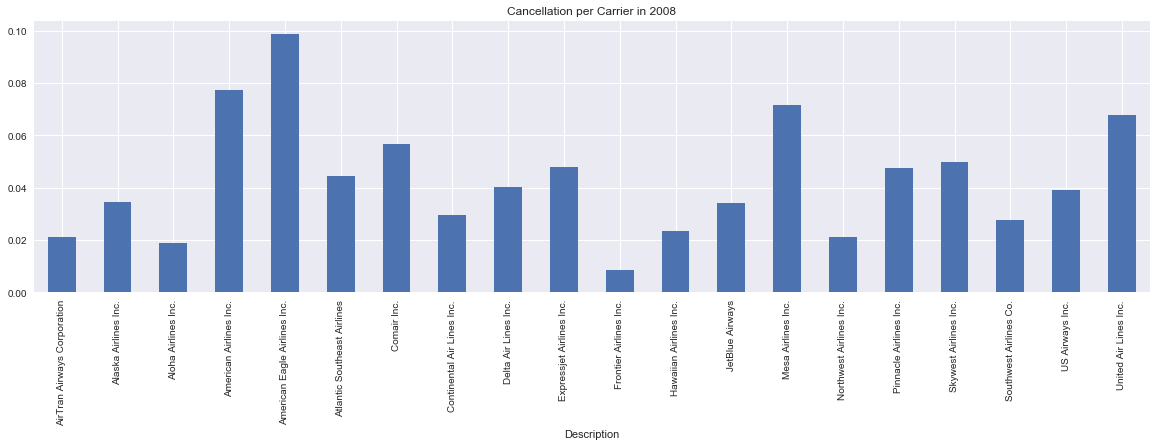

In [17]:
# visualization of cancellation rate per Carrier 
proportional_cancellations_g.plot(kind='bar', stacked=False, figsize=[20,5],title ="Cancellation per Carrier in 2008")
plt.show()

In [18]:
def getCodes(dataFrame):
    result = {}
    for month in range(1,13):
        preDF = dataFrame[dataFrame['Month'] == month]
        result[month] = {}
        result[month]['A'] = len(preDF[preDF['CancellationCode'] == 'A'])
        result[month]['B'] = len(preDF[preDF['CancellationCode'] == 'B'])
        result[month]['C'] = len(preDF[preDF['CancellationCode'] == 'C'])
        result[month]['D'] = len(preDF[preDF['CancellationCode'] == 'D'])
    return pd.DataFrame().from_dict(result, orient= 'index')

codeDF = getCodes(df)
codeDF

,A,B,C,D
1,6106,5080,3181,0
2,5693,6773,3587,2
3,5395,4719,2184,4
4,4890,1277,1364,0
5,2980,1158,1348,3
6,4023,2974,2813,0
7,4763,2220,2285,0
8,3653,2703,1911,0
9,2110,2966,990,1
10,1947,522,468,0


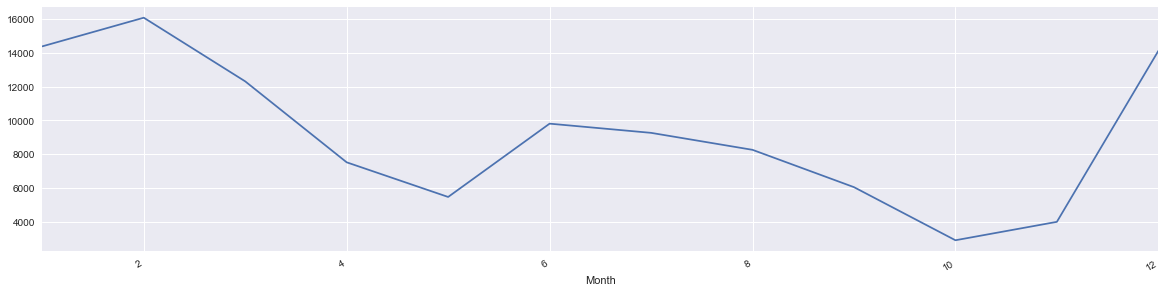

In [19]:
# Cancellations by month.
grouped_carrier = df.groupby(by=[ 'Month'])
sum_cancellations = grouped_carrier['Cancelled'].sum() 
sum_cancellations.plot(subplots=True, figsize=(20,5))
plt.show()

From this graph, we see a trend to increasing cancellation rate during the summer and winter holiday season. It would be nice to investigate on the reasons behind the cancellations. 

There is a clear peak in the cancellation rate in the winter month, which is reasonable. Bad weather with Ice and Snow can lead to a high cancellation rate. Whereas the light peak in June needs to be further investigated. 

The assumption of bad weather having influence on the cancellation rate in winter looks as if it is highly correlated to the winter months.  Whereas the peak in summer is more due carrier reasons whatever that means, weather and NAS are involved as well wehreas security reasons influence is nearly Null. 


A = carrier, B= weather, C=NAS, D = security



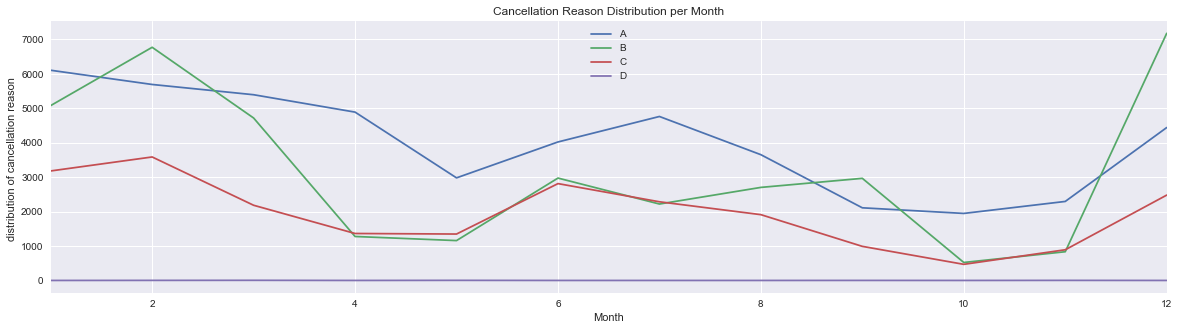

In [20]:
codeDF.plot(subplots=False, figsize=(20,5))
plt.ylabel('distribution of cancellation reason ')
plt.xlabel('Month')
plt.title('Cancellation Reason Distribution per Month')
plt.show()

Additional information provied for the breakdown on Airline Cancellation Codes in the following code snippet. A dictionary per Airline is delivered containing the Cancellation reasons. 

In [21]:
# Cancellations by carrier and month.
def getCodesWithAirline(dataFrame):
    result = {}
    for month in range(1,13):
        preDF1 = dataFrame[dataFrame['Month'] == month]
        result[month] = {}
        for airline in set(preDF1['Description']):
            result[month][airline] = {}
            preDF2 = preDF1[preDF1['Description'] == airline]
            
            result[month][airline]['A'] = len(preDF2[preDF2['CancellationCode'] == 'A'])
            result[month][airline]['B'] = len(preDF2[preDF2['CancellationCode'] == 'B'])
            result[month][airline]['C'] = len(preDF2[preDF2['CancellationCode'] == 'C'])
            result[month][airline]['D'] = len(preDF2[preDF2['CancellationCode'] == 'D'])
    return pd.DataFrame().from_dict(result, orient='index')

airline_code= getCodesWithAirline(df)
#airline_code


In [60]:
# no of flights 
monthly_flights = df.groupby(by=['Month'])
g =monthly_flights.size()
#g

In [61]:
# monthly cancellation rate 
grouped_m = df.groupby(by=['Month'])
prop_m = (grouped_m['Cancelled'].sum() / grouped_m.size())
#prop_m

In [69]:
frames = [g, prop_m]
df42 = pd.concat(frames, axis=1)
df42['flights']= df42[0]
df42['can_rate']= df42[1]
#df42.drop('month')
df42.pop (0)
df42.pop (1)
df42

,flights,can_rate
Month,,
1,207605,0.069204
2,195645,0.082062
3,207057,0.059414
4,193738,0.038872
5,197939,0.027731
6,199699,0.049124
7,205536,0.045092
8,201651,0.040997
9,174747,0.034719


In [83]:
df42.iloc[1]

flights     195645.000000
can_rate         0.082062
Name: 2, dtype: float64

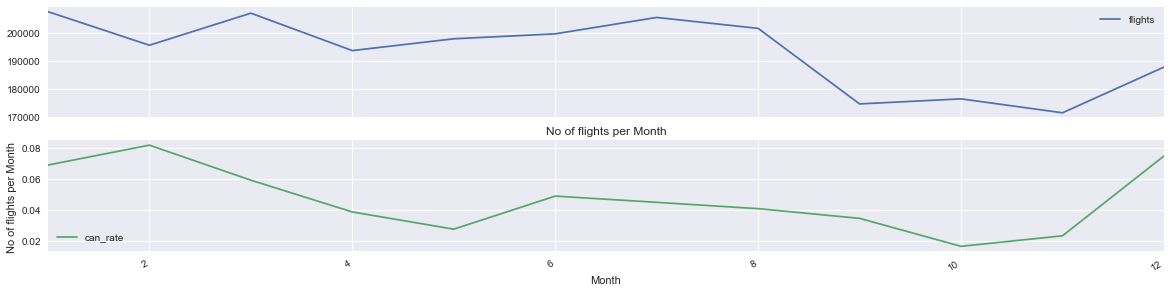

In [59]:
df42.plot(subplots=True, figsize=(20,5))
plt.ylabel('No of flights per Month ')
plt.xlabel('Month')
plt.title('No of flights per Month')
plt.show()

In [100]:
#airport view - Top 10 Airports  
dest = df.groupby(by=['airport'])
d =dest.size()
d.sort_values (ascending = False)[:10]


airport
William B Hartsfield-Atlanta Intl    114718
Chicago O'Hare International         112165
Denver Intl                           79867
Dallas-Fort Worth International       62758
Detroit Metropolitan-Wayne County     58419
Phoenix Sky Harbor International      57092
George Bush Intercontinental          54906
Los Angeles International             52796
Salt Lake City Intl                   51591
McCarran International                50023
dtype: int64